In [1]:
import scipy.stats
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from CharacterFeatureExtractor import featureExtractor
from DrawCharacter import DrawCharacter
from createDataSet import createDataSet
from PattRecClasses import HMM_TA 
from featurevisual import featurevisual

# Test feature extractor

In [2]:
createDataSet(act=False, name="database")

/home/jonas/Local/Pattern-Recognition-Project
Dataset saved


# Load in data

In [3]:
### data prep
#db_name = "database_inc_sampchar"
db_name = "database"
data = pd.read_pickle(r'data/'+db_name+'.cdb')
data_features1 = pd.read_pickle(r'data/'+db_name+'_features.cdb')
data_labels1 = pd.read_pickle(r'data/'+db_name+'_labels.cdb')
data_sampchar1 = pd.read_pickle(r'data/'+db_name+'_sampchar.cdb')

# data_features[k][r] == np.array (ndim, t); K (number of letters) of R samples with Tr individual lengths

db_name = "database_inc_sampchar"
data = pd.read_pickle(r'data/'+db_name+'.cdb')
data_features2 = pd.read_pickle(r'data/'+db_name+'_features.cdb')
data_labels2 = pd.read_pickle(r'data/'+db_name+'_labels.cdb')
data_sampchar2 = pd.read_pickle(r'data/'+db_name+'_sampchar.cdb')


# Data visualization

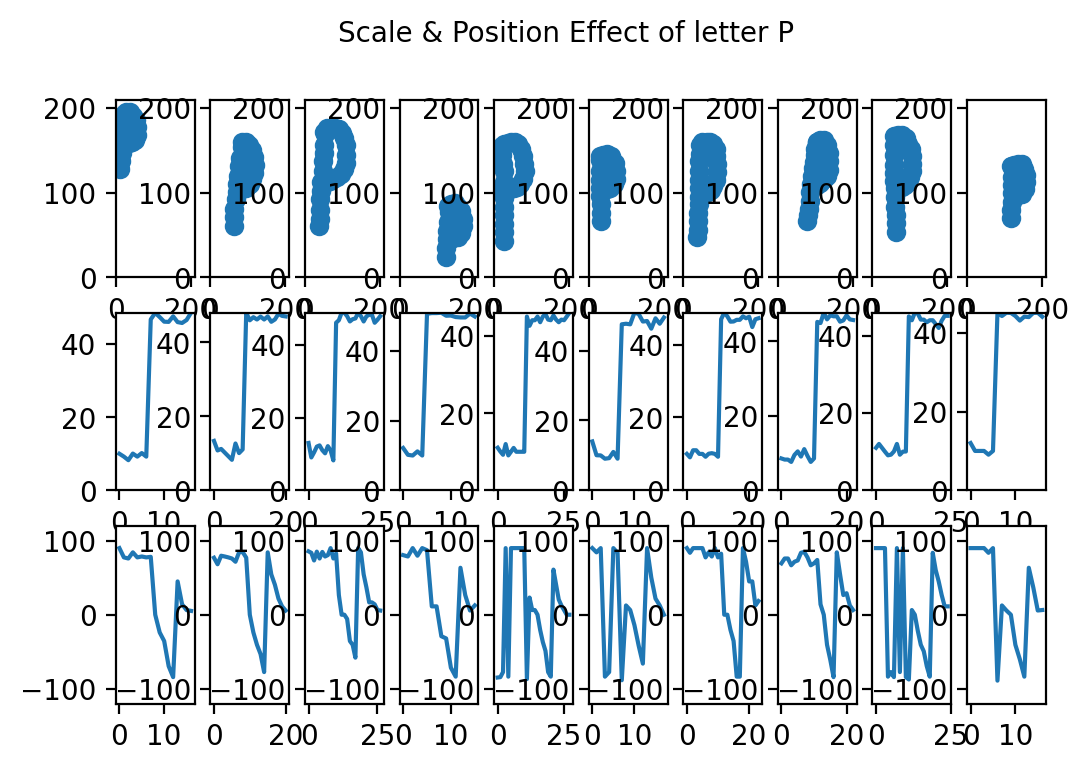

In [4]:
featurevisual(data_features1, data_labels1, data_sampchar1, chars=[3])

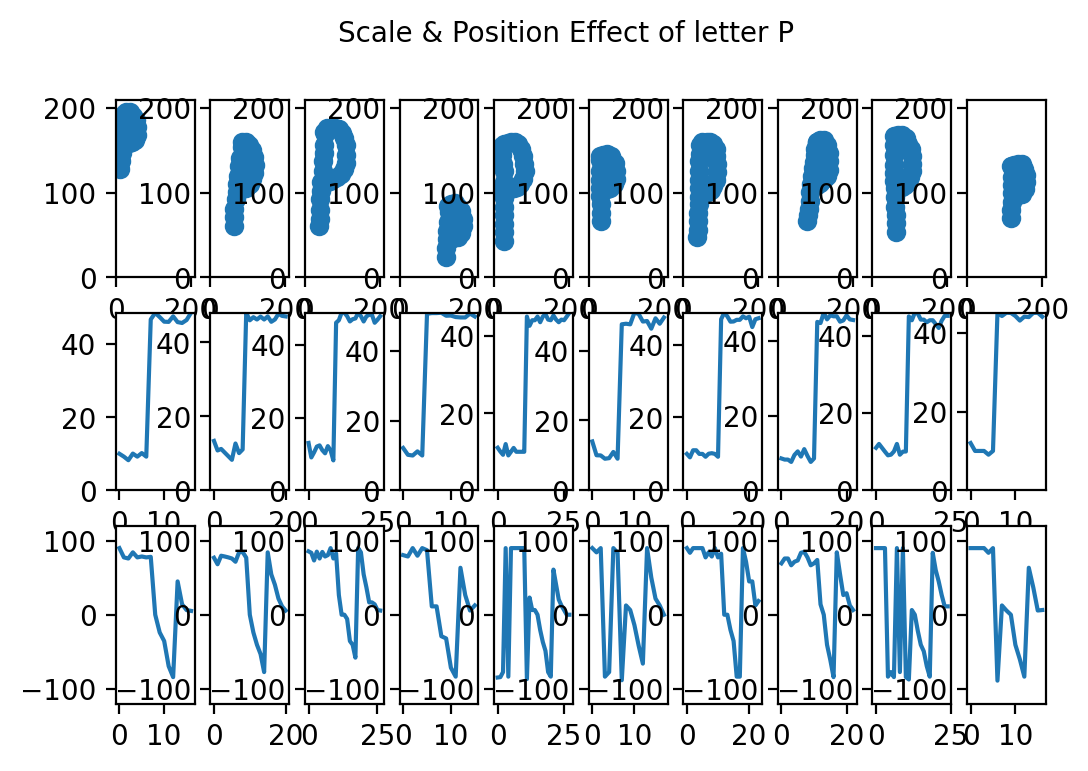

In [5]:
featurevisual(data_features2, data_labels2, data_sampchar2, chars=[3])

# Load in HMMs

In [6]:
hmm_learn = pd.read_pickle(r'legit_hmm')

char = 3
feature_symbol1, states = (hmm_learn[char].rand(20))

#hmm_learn[char].printoutput(0,0)

feature_symbol1 = np.transpose(feature_symbol1)


plt_num = 1  # number of samples plotted
f, axarr = plt.subplots(2, 1, dpi = 200)
f.suptitle('Scale & Position Effect of letter '+data_labels1[char], fontsize=10)

# normalized distance ,slope, and t for symbol-1
f1_symbol1 = feature_symbol1[0]
f2_symbol1 = feature_symbol1[1]
t1 = np.array(range(0,feature_symbol1.shape[1]))


#------------- ABSOLUTE DISTANCE FEATURE
#Absolute distance plot of symbol-1
axarr[0].plot(t1, f1_symbol1)
axarr[0].plot(t1, states*10)

#axarr[1, i].set(xlabel = "Time", ylabel = "Normalized Distance")
axarr[0].set_ylim([-5,np.max(f1_symbol1)])

#------------- SLOPE FEATURE
#Y-wise distance plot of symbol-1
axarr[1].plot(t1, f2_symbol1)
axarr[1].plot(t1, states*20)

#axarr[2, i].set(xlabel = "Time", ylabel = "Slope(Degrees)")
axarr[1].set_ylim([-120,120])


featurevisual(data_features2, data_labels2, data_sampchar2, chars=[char])

ValueError: probabilities contain NaN

In [ ]:
for char in range(len(data_labels)):

    #char = 5 # which character in the label list we are using
    obs = data_features[char]
    raw_obs = data[char]
    sampchar = data_sampchar[char]

    plt_num = len(data_features)  # number of samples plotted
    f, axarr = plt.subplots(3, plt_num, dpi = 200)
    f.suptitle('Scale & Position Effect of letter '+data_labels[char], fontsize=10)

    for i in range(plt_num):

        feature_symbol1 = obs[i]
        sampled_symbol1 = sampchar[i]

        # normalized distance ,slope, and t for symbol-1
        f1_symbol1 = feature_symbol1[0]
        f2_symbol1 = feature_symbol1[1]
        t1 = np.array(range(0,feature_symbol1.shape[1]))

        # mean and number of states required:
        # killgissa?

        #------------- SYMBOL DRAWINGS
        #Drawing of sampled symbol-1
        axarr[0, i].scatter(sampled_symbol1[0], sampled_symbol1[1])
        #axarr[0, i].set(xlabel = "X-Coordinate", ylabel = "Y-Coordinate")
        #axarr[0, i].set_title('Symbol-1')
        axarr[0, i].set_xlim([0,210])
        axarr[0, i].set_ylim([0,210])

        #------------- ABSOLUTE DISTANCE FEATURE
        #Absolute distance plot of symbol-1
        axarr[1, i].plot(t1, f1_symbol1)
        #axarr[1, i].set(xlabel = "Time", ylabel = "Normalized Distance")
        axarr[1, i].set_ylim([0,np.max(f1_symbol1)])

        #------------- SLOPE FEATURE
        #Y-wise distance plot of symbol-1
        axarr[2, i].plot(t1, f2_symbol1)
        #axarr[2, i].set(xlabel = "Time", ylabel = "Slope(Degrees)")
        axarr[2, i].set_ylim([-120,120])

    plt.show()

    """ Observed results:
    X: 2 states, 
    f1s1mean=10
    f1s2mean=45
    f2s1mean=-60
    f2s2mean=70
    """